In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,export

ModuleNotFoundError: No module named 'pandas'

In [186]:
data = pd.read_csv('assets/dataset/pass.csv',error_bad_lines = False,nrows = 20000)
nLinhas, nColunas = data.shape
print(f'Existem {nLinhas} linhas e {nColunas} colunas')

Existem 20000 linhas e 2 colunas


b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\n'


In [195]:
#Definindo função para retornar uma lista com informações da string 
#[n chars minusculos, n chars maiusculos,n chars especiais, n numeros, tamanho]
def str_infos(string):
    string = str(string)
    strlen = len(string)
    strlowcase = len(re.findall('[a-z]',string))
    strupcase = len(re.findall('[A-Z]',string))
    strnum = len(re.findall('[0-9]',string))
    strspec = len(re.findall('[!¡$%&/\()=?¿*+-_{}]',string))
    strspec = strspec - (strnum + strupcase)
    lst_result = [strlowcase,strupcase,strspec,strnum,strlen] 
    
    return lst_result

#Definindo função para receber uma lista de strings e retornar listas da função str_infos()
def str_list_info(listr):
    sl,slc,suc,sn,ss = [],[],[],[],[]
    for i in range(len(listr)):
        infos = str_infos(listr[i])
        sl.append(infos[0]),slc.append(infos[1]),suc.append(infos[2]),sn.append(infos[3]),ss.append(infos[4])
    
    return sl,slc,suc,sn,ss

#Definindo função para retornar o resultado da predição
def pass_strength(password):
    info = str_infos(password)
    password_infos = [info[0],info[1],info[2],info[3],info[4]]
    predict  = modelo.predict([password_infos]) #este método será declarado no decorrer do codigo
    
    if predict == 1:
        result = 'medium' 
    elif predict == 0:
        result = 'weak'
    elif predict == 2:
        result = 'strong'
        
    return result

In [196]:
v1,v2,v3,v4,v5 = str_list_info(data['password'])
data['lower_ch'],data['upper_ch'],data['special_ch'],data['num_numbers'],data['pass_length'] = v1,v2,v3,v4,v5

In [204]:
data.head()

,password,strength,lower_ch,upper_ch,special_ch,num_numbers,pass_length
0,kzde5577,1,4,0,0,4,8
1,kino3434,1,4,0,0,4,8
2,visi7k1yr,1,7,0,0,2,9
3,megzy123,1,5,0,0,3,8
4,lamborghin1,1,10,0,0,1,11


In [197]:
#Dividindo dataset em dados de entrada(x) e saida(y) 
x,y = data,data['strength']
x = x.drop(['password','strength'],axis=1)

#Dividindo dados de entrada(x) e saida(y) em dados de treino(x_train,y_train) e teste(x_test,y_test) 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [198]:
modelo = DecisionTreeClassifier(criterion='entropy')
modelo.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [199]:
print(modelo.feature_importances_)

[0. 0. 0. 0. 1.]


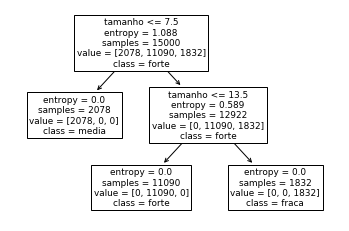

In [200]:
tree = export.plot_tree(modelo,
                feature_names=['minusculas','maiusculas','especiais','numeros','tamanho'],
                class_names=['media','forte','fraca'],
                max_depth=10,)

In [201]:
data.corr()

,strength,lower_ch,upper_ch,special_ch,num_numbers,pass_length
strength,1.000000,0.229103,0.623371,0.152086,0.175522,0.842784
lower_ch,0.229103,1.000000,-0.104633,0.100678,-0.569037,0.362983
upper_ch,0.623371,-0.104633,1.000000,0.010737,-0.079853,0.674160
special_ch,0.152086,0.100678,0.010737,1.000000,0.034624,0.238709
num_numbers,0.175522,-0.569037,-0.079853,0.034624,1.000000,0.165217
pass_length,0.842784,0.362983,0.674160,0.238709,0.165217,1.000000


In [202]:
predicao = modelo.predict(x_test)
accuracy_score(predicao,y_test)

1.0

In [203]:
password = input('Digite uma senha: ')
result = pass_strength(password)
print('pass strength:', result)

Digite uma senha: 11@@jupyySS
pass strength: medium
